In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier
import warnings

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "earthquake_alert_balanced_dataset.csv"

# Load the latest version
df =pd.read_csv(file_path)
df = df.drop_duplicates(keep='first').reset_index(drop=True)

print("First 5 records:", df.head())

First 5 records:    magnitude  depth  cdi  mmi   sig  alert
0        7.0   14.0  8.0  7.0   0.0  green
1        6.9   25.0  4.0  4.0 -33.0  green
2        7.0  579.0  3.0  3.0 -13.0  green
3        7.3   37.0  5.0  5.0  65.0  green
4        6.6  624.0  0.0  2.0 -98.0  green


f:\projects\ML algorithms 2025\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.describe()

,magnitude,depth,cdi,mmi,sig
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,7.060796,51.316879,6.960191,6.917994,-10.404459
std,0.423277,105.899870,2.245138,1.363892,62.370941
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.710000,12.000000,6.000000,6.000000,-55.000000
50%,6.995000,19.000000,8.000000,7.000000,-8.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


In [4]:
df['alert']=df['alert'].map({'green':0,'yellow':1,'orange':2,'red':3})

<BarContainer object of 4 artists>

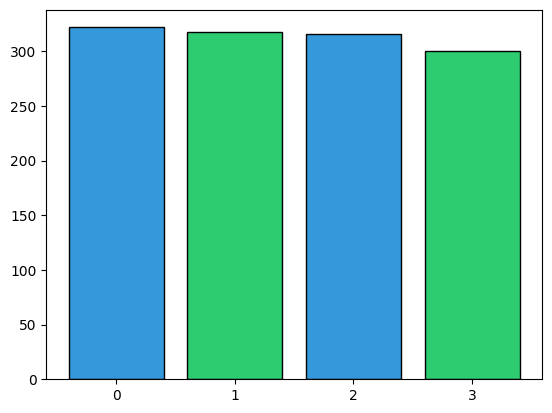

In [5]:
X = df.drop('alert', axis=1)
y = df['alert']


counts = y.value_counts()

plt.bar(counts.index.astype(str), counts.values, color=['#3498db', '#2ecc71'], edgecolor='black')

In [6]:
cols = df.columns
cols

Index(['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert'], dtype='object')

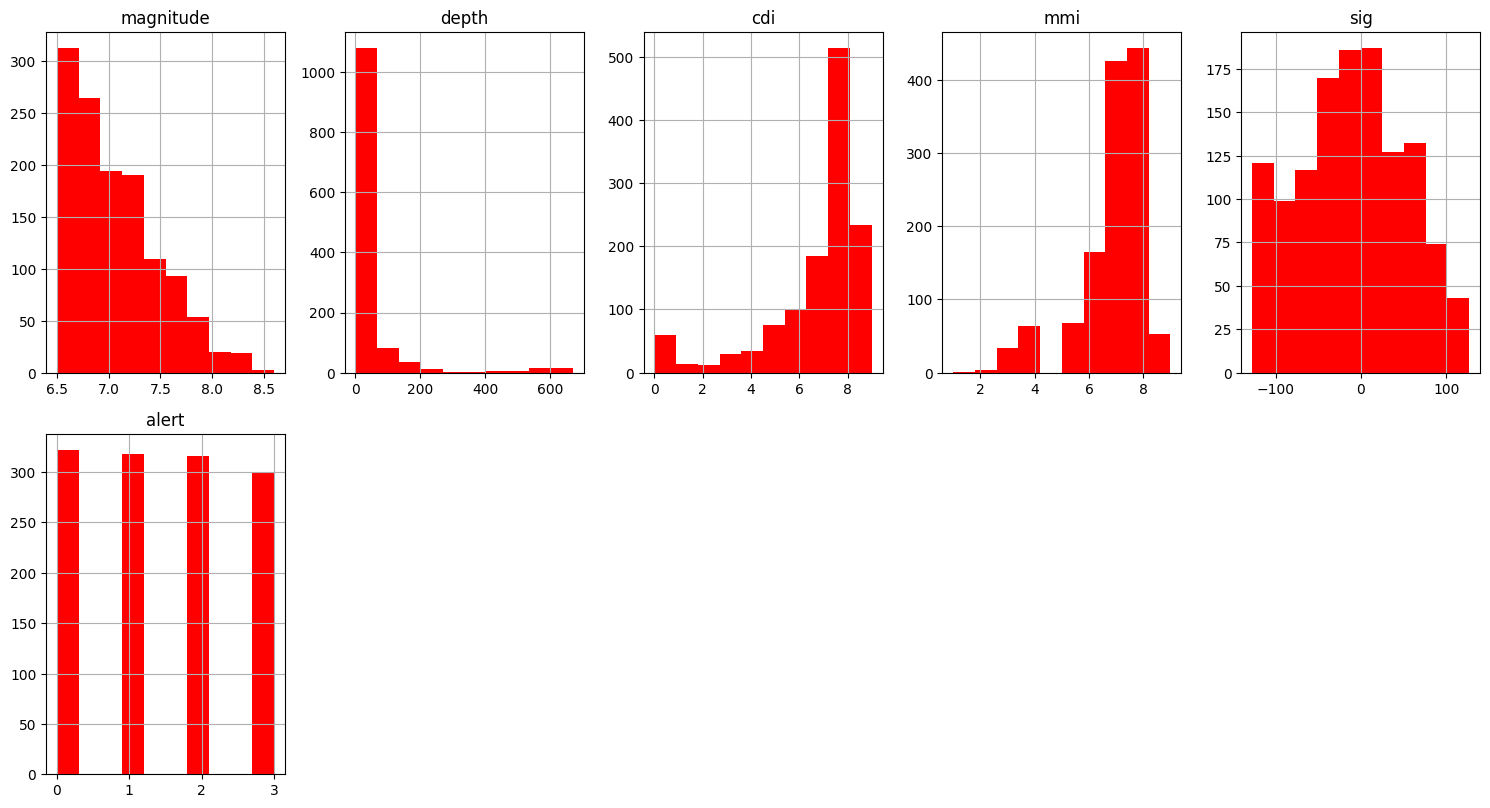

In [7]:
fig,axes = plt.subplots(5,5,figsize=(15,20))
axes = axes.flatten()

for i,col in enumerate(cols):
    axes[i].hist(df[col],color="red")
    axes[i].set_title(col)
    axes[i].grid(True)
for j in range(len(cols),len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

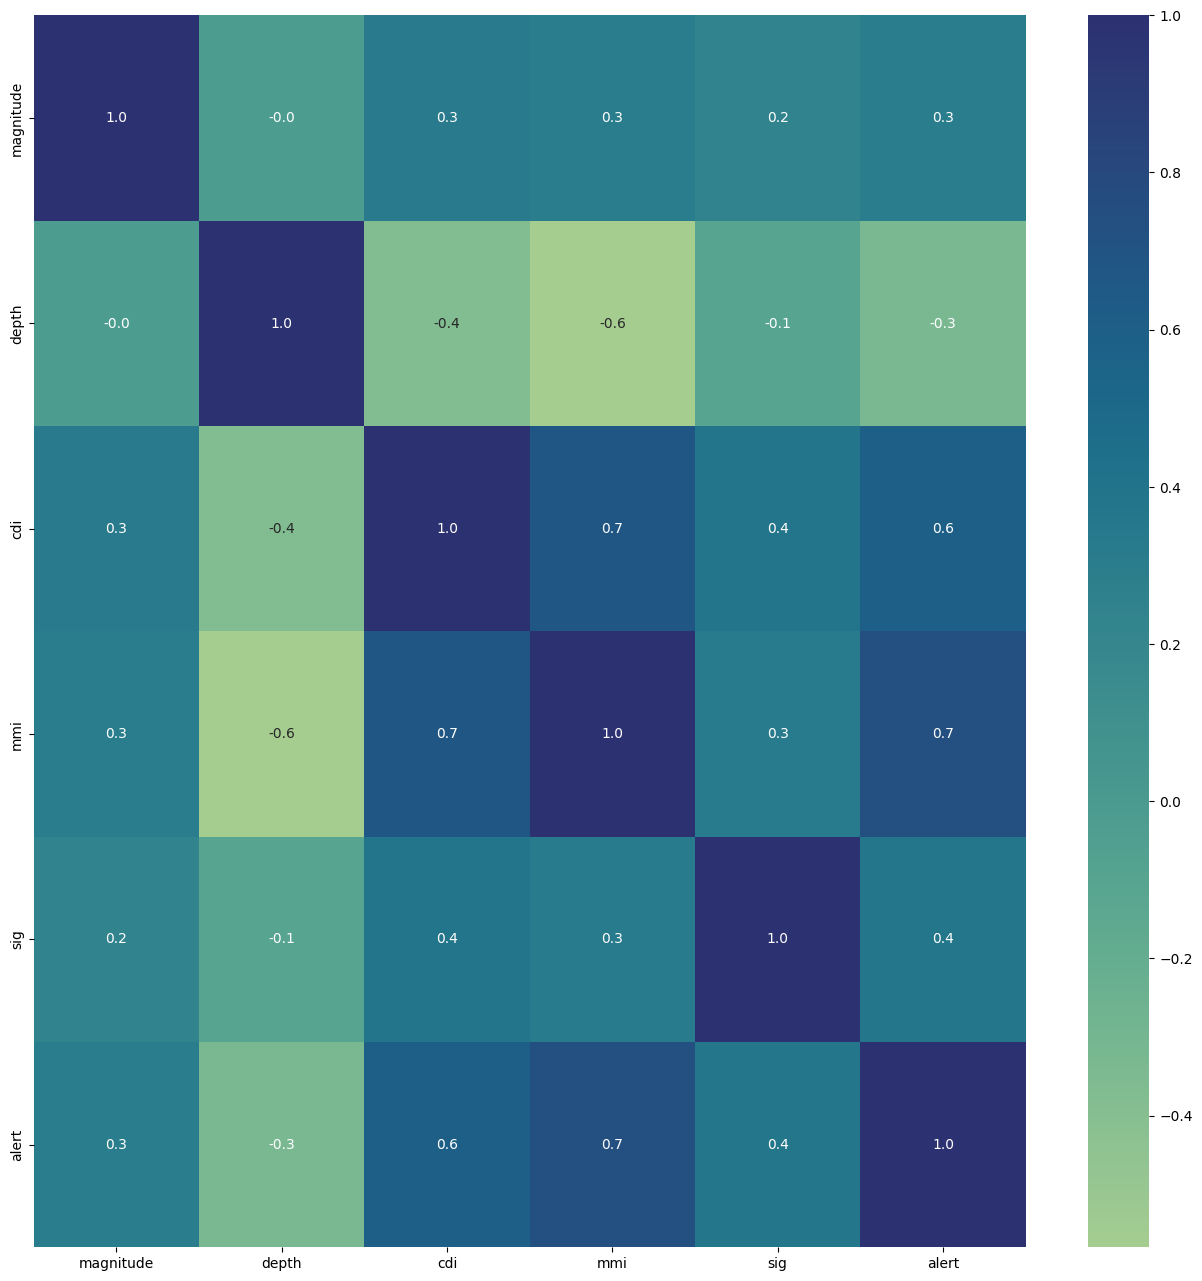

In [8]:
train_corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(train_corr,annot=True,cmap='crest',fmt='.1f')
plt.show()

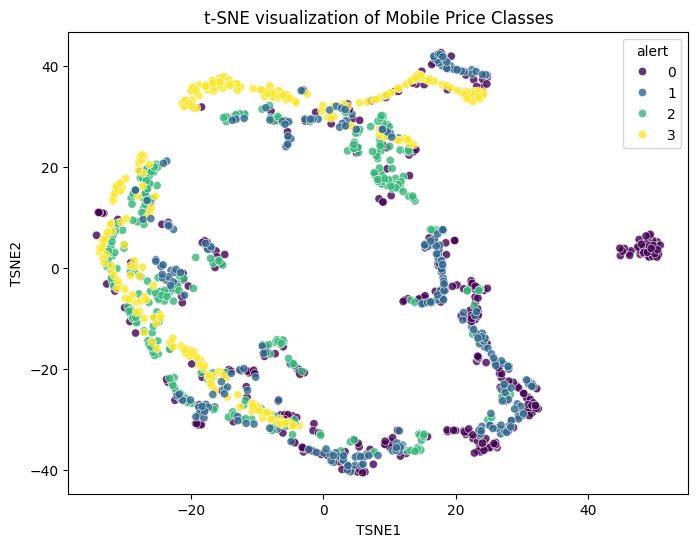

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# t-SNE с 2 компонентами
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_embedded = tsne.fit_transform(X)

# Переводим в DataFrame
df_tsne = pd.DataFrame(X_embedded, columns=["TSNE1", "TSNE2"])
df_tsne["alert"] = y

# Визуализация
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_tsne, 
    x="TSNE1", 
    y="TSNE2", 
    hue="alert", 
    palette="viridis", 
    alpha=0.8
)
plt.title("t-SNE visualization of Mobile Price Classes")
plt.show()



In [10]:
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(0)

In [11]:
has_duplicates = df.duplicated().any()
print("Есть дубликаты?" , has_duplicates)


Есть дубликаты? False


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)




knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2, )
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


0.8530973451327434
0.8584070796460177
0.856637168141593
0.8451327433628318
0.8451327433628318
0.8398230088495575
0.8407079646017699
0.831858407079646


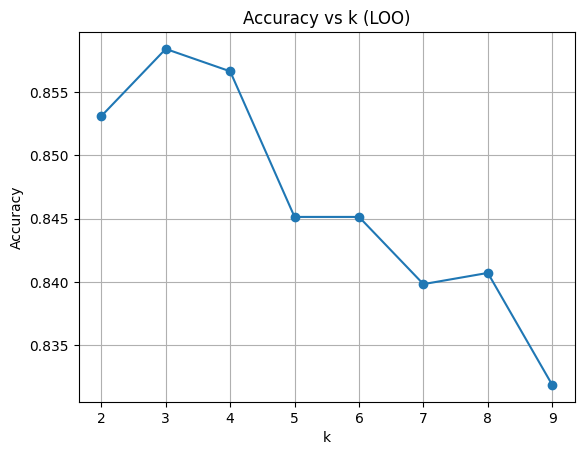

In [14]:
from classifier.KnnClassifier import KnnClassifier


knn2 = KnnClassifier(ord = 2, weights ="uniform")

knn2.fit(X_train, y_train.values)

In [15]:
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Validation Accuracy: {knn_accuracy:.4f}")

KNN Validation Accuracy: 0.8968


In [16]:
a = knn2.predict(X_test)
count=0
for a,b in zip(a, y_test):
    if a==b:
        count+=1
count/len(y_test)


0.8968253968253969

Начальное CCV=inf, Ω=[np.int64(0), np.int64(1), np.int64(2), np.int64(4)]

Добавили 276, CCV=0.524683, размер Ω=5

Добавили 982, CCV=0.432589, размер Ω=6

Добавили 878, CCV=0.360023, размер Ω=7

Добавили 571, CCV=0.333319, размер Ω=8

Добавили 443, CCV=0.317205, размер Ω=9

Добавили 994, CCV=0.301998, размер Ω=10

Добавили 856, CCV=0.287694, размер Ω=11

Добавили 458, CCV=0.280427, размер Ω=12

Добавили 257, CCV=0.274923, размер Ω=13

Добавили 891, CCV=0.269428, размер Ω=14

Добавили 454, CCV=0.264817, размер Ω=15

Добавили 750, CCV=0.250608, размер Ω=16

Добавили 98, CCV=0.246893, размер Ω=17

Добавили 717, CCV=0.239698, размер Ω=18

Добавили 894, CCV=0.235129, размер Ω=19

Добавили 316, CCV=0.231437, размер Ω=20

Добавили 173, CCV=0.228620, размер Ω=21

Добавили 115, CCV=0.225809, размер Ω=22

Добавили 178, CCV=0.223002, размер Ω=23

Добавили 699, CCV=0.220200, размер Ω=24

Добавили 849, CCV=0.217402, размер Ω=25

Добавили 290, CCV=0.214609, размер Ω=26

Добавили 148, CCV=0.212686, р

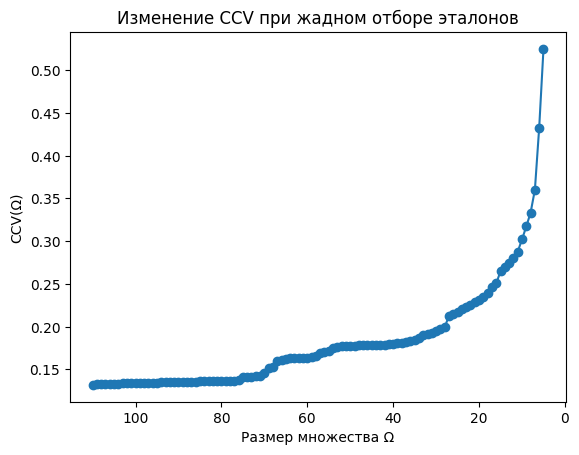

In [ ]:
from selector.selector import Selector
selector = Selector(X_train, y_train, verbose=True, epsilon=1.3e-4)
omega = selector.select_add()


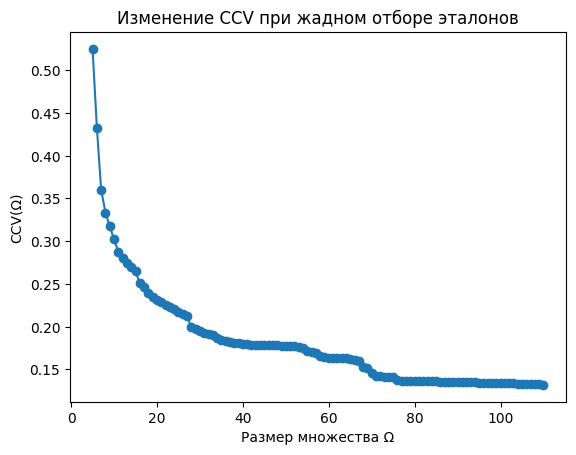

In [23]:
selector.plot_history(mode='remove')

In [18]:
y_train = np.array(y_train)

In [19]:
for i in omega:
    print(i, end=", ")

0, 1, 2, 4, 276, 982, 878, 571, 443, 994, 856, 458, 257, 891, 454, 750, 98, 717, 894, 316, 173, 115, 178, 699, 849, 290, 148, 515, 569, 506, 264, 224, 90, 279, 460, 321, 628, 729, 259, 962, 6, 8, 26, 30, 36, 37, 41, 46, 50, 51, 53, 57, 787, 310, 832, 952, 987, 980, 407, 621, 5, 34, 69, 70, 80, 138, 711, 208, 346, 661, 490, 83, 87, 88, 92, 967, 477, 95, 96, 104, 107, 114, 118, 121, 123, 133, 136, 147, 157, 159, 160, 171, 183, 184, 186, 190, 193, 196, 219, 220, 227, 237, 240, 249, 253, 255, 258, 244, 117, 273, 

In [20]:
X_train_selected = X_train[omega]
y_train_selected = y_train[omega]

0.7545454545454545
0.7454545454545455
0.7727272727272727
0.7363636363636363
0.7636363636363637
0.7818181818181819
0.7818181818181819
0.7818181818181819


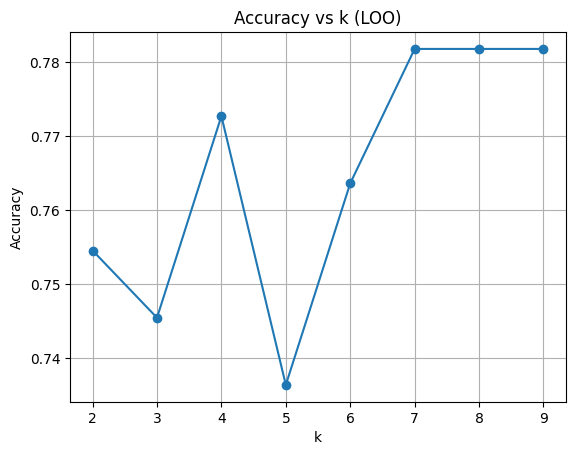

7

In [21]:
knn2 = KnnClassifier(ord = 2, k=5, weights ="kernel")

knn2.fit(X_train_selected, y_train_selected)
knn2.k

In [22]:
count=0
a = knn2.predict(X_test)

for a,b in zip(a, y_test):
    if a==b:
        count+=1
count/len(y_test)

0.8015873015873016